In [1]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('/content/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
sns.set()

/tmp/ipython-input-10-641376550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


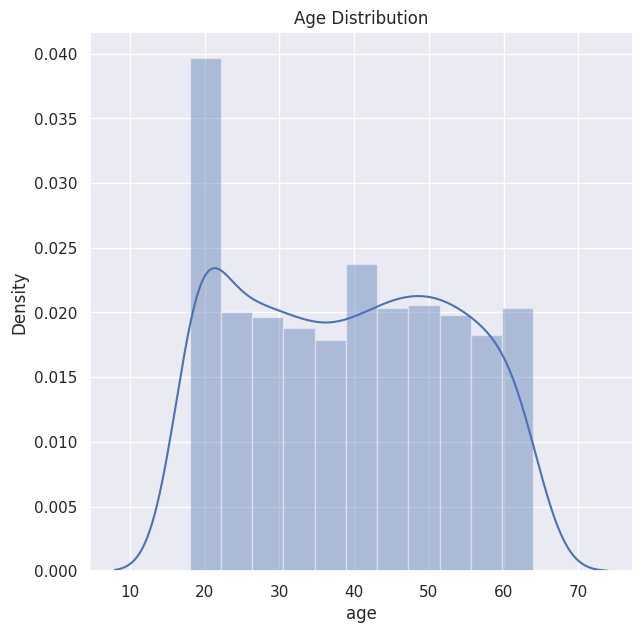

In [10]:
plt.figure(figsize=(7,7))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

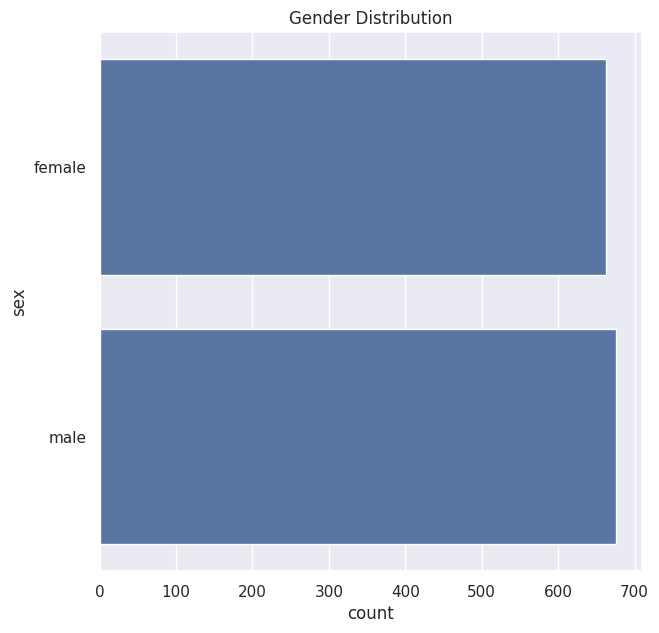

In [11]:
# Gender column
plt.figure(figsize=(7,7))
sns.countplot(data['sex'])
plt.title('Gender Distribution')
plt.show()

In [12]:
data['sex'].value_counts()

,count
sex,
male,676
female,662


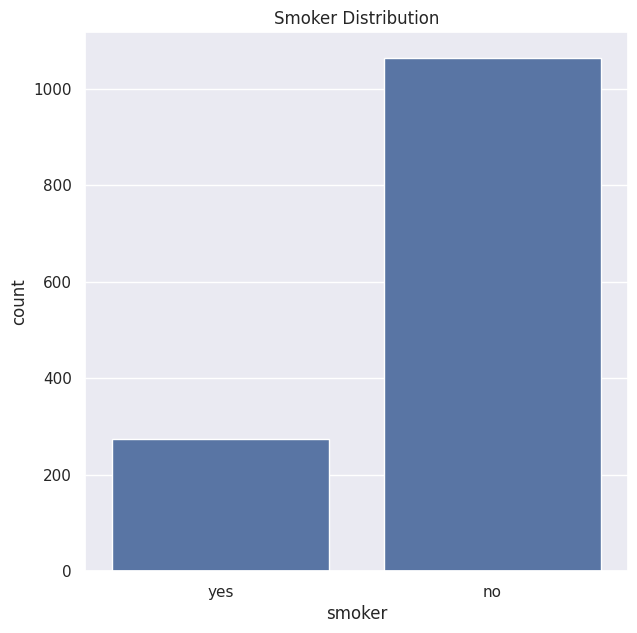

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(x='smoker',data=data)
plt.title('Smoker Distribution')
plt.show()

/tmp/ipython-input-14-379915451.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


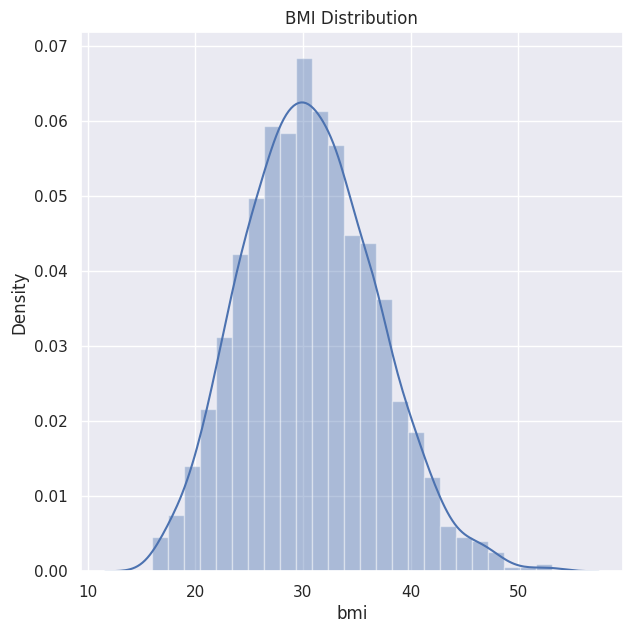

In [14]:
# BMI Distribution
plt.figure(figsize=(7,7))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

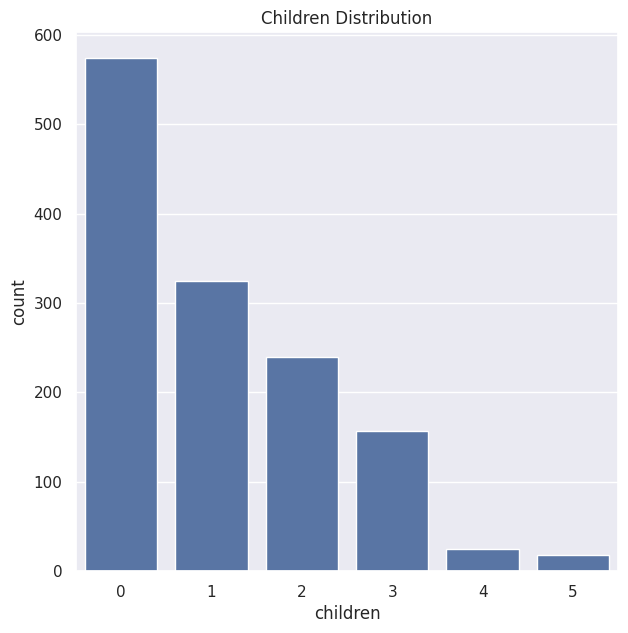

In [16]:
# children column
plt.figure(figsize=(7,7))
sns.countplot(x='children',data=data)
plt.title('Children Distribution')
plt.show()

In [18]:
data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


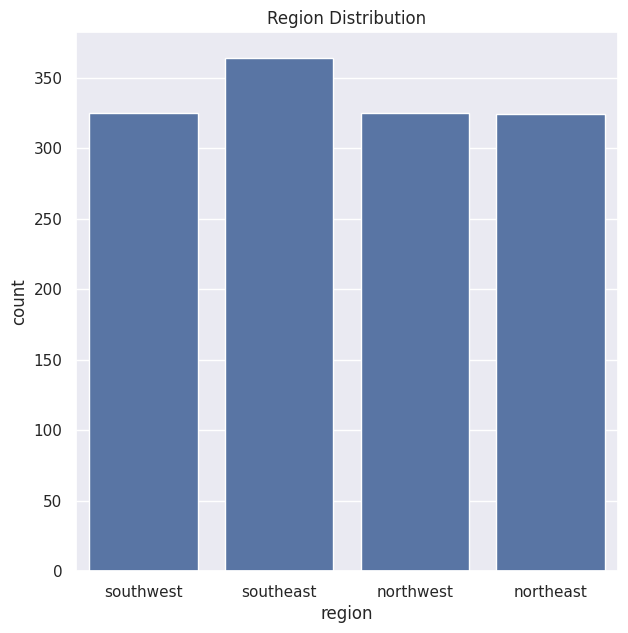

In [19]:
plt.figure(figsize=(7,7))
sns.countplot(x='region',data=data)
plt.title('Region Distribution')
plt.show()

In [20]:
data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-22-4105620955.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


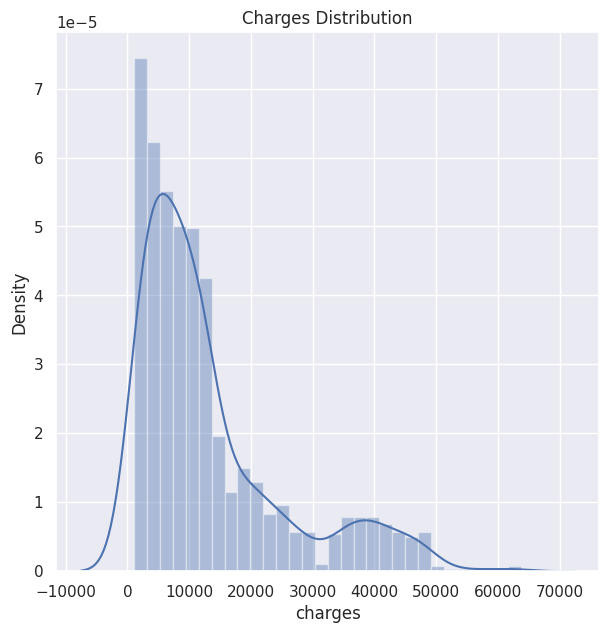

In [22]:
# distribution of charges
plt.figure(figsize=(7,7))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

In [33]:
# encoding categorical values
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

/tmp/ipython-input-33-4033405113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-33-4033405113.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':0,'no':1}},inplace=True)


In [34]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [35]:
# splitting the feautures and target
X=data.drop(columns='charges',axis=1)
Y=data['charges']

In [36]:
# splittig training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [37]:
# Model training
model=LinearRegression()

In [38]:
model.fit(X_train,Y_train)

LinearRegression()

In [39]:
# Model Evaluation
training_data_prediction=model.predict(X_train)


In [40]:
R2_score=r2_score(Y_train,training_data_prediction)

In [41]:
print('R2 score:',R2_score)

R2 score: 0.751505643411174


In [42]:
test_data_prediction=model.predict(X_test)

In [43]:
R2_score=r2_score(Y_test,test_data_prediction)

In [44]:
print('R2 score:',R2_score)

R2 score: 0.7447273869684076


In [46]:
# Predictive System
input_data=(31,1,25.74,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])


[3760.0805765]
The insurance cost is USD 3760.080576496057


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
